<a href="https://colab.research.google.com/github/tanmey007/ML_SUV/blob/master/SUV_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries used

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,precision_recall_curve
from shapely.geometry import LineString
import numpy as np
from sklearn.preprocessing import LabelBinarizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing Dataset

In [2]:
uploaded=files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [0]:
social=pd.read_csv('Social_Network_Ads.csv')

In [0]:
social.set_index('User ID', inplace=True)

## Visualizing dataset

In [5]:
social.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 15624510 to 15594041
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.6+ KB


So there is no null values


Checking the split between male and female customers

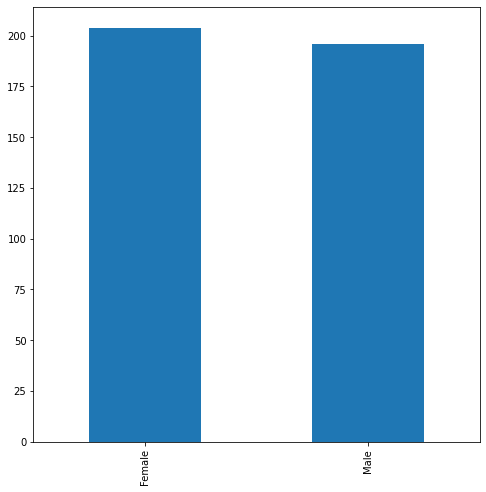

In [6]:
social['Gender'].value_counts().plot(kind='bar',figsize=(8,8))

Almost an equal split between male and females, although females are slightly more than males

Let's check the distribution of age

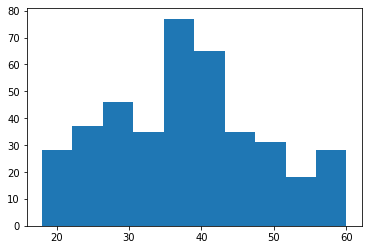

In [7]:
plt.hist(social['Age'])
plt.show()

We have a majority of population between age 35-45

Let's check the distribution of estimated salary

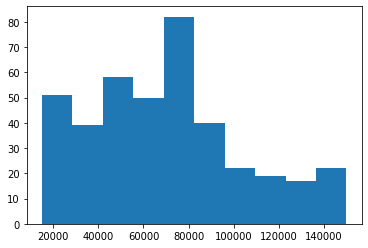

In [8]:
plt.hist(social['EstimatedSalary'])
plt.show()

In [9]:
social['EstimatedSalary'].median()

70000.0

In [10]:
social['EstimatedSalary'].mean()

69742.5

We have meadian salary of 70k

Now let's check the output label's

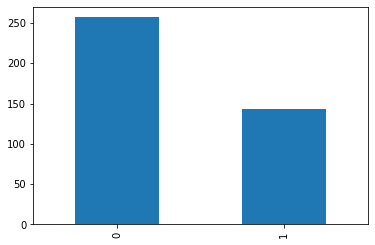

In [11]:
social['Purchased'].value_counts().plot(kind='bar')

Let's check how gender and age are distributed

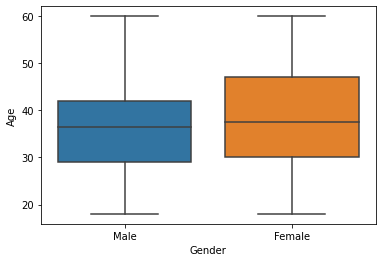

In [12]:
sns.boxplot(x='Gender',y='Age',data=social)

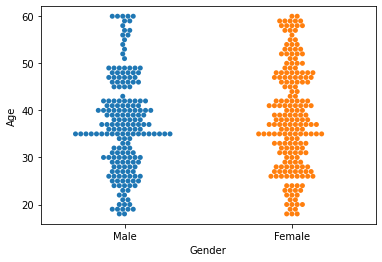

In [13]:
sns.swarmplot(x='Gender',y='Age',data=social)

Similarly let's check how gender and employment is spread


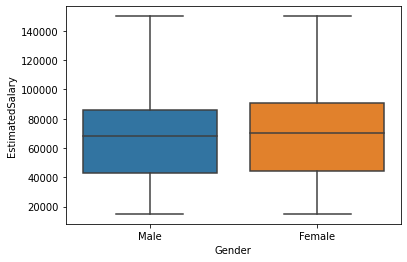

In [14]:
sns.boxplot(x='Gender',y='EstimatedSalary',data=social)

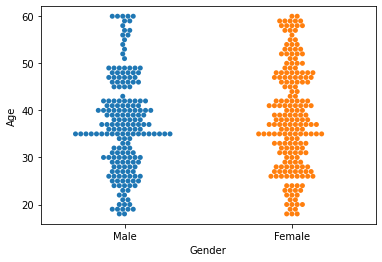

In [15]:
sns.swarmplot(x='Gender',y='Age',data=social)

Let's check whether there is correlation between age and estimated salary

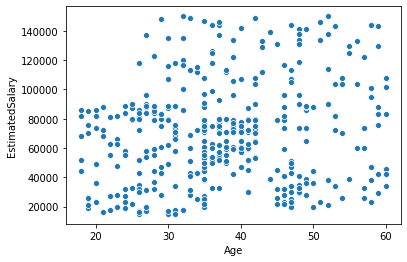

In [16]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=social)

There seems to be no correlation between age and estimated salary which is counterintuitive

Now let's see how age is distributed in buyers and non-buyers

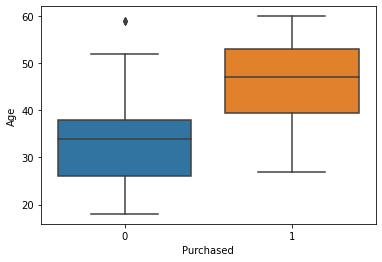

In [17]:
sns.boxplot(x='Purchased',y='Age',data=social)

So we can see mean age of buyers is more than non-buyers

Similarly we see distribution of estimated salary in buyers and non buyers, which is intutive as older people would prefer SUV than younger age 

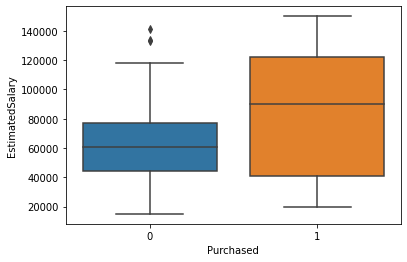

In [18]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=social)

Mean salary of buyers of SUV is more than non-buyers, which is also kind of intutive

Now, let's check how many females and males actually bought SUV

In [0]:
temp=social.groupby(['Purchased','Gender']).size()

In [0]:
temp=temp.unstack()

In [21]:
temp

Gender,Female,Male
Purchased,,
0,127,130
1,77,66


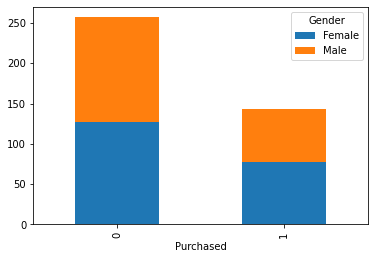

In [22]:
temp.plot(kind='bar',stacked=True)

We have more women buyers than men

## Spliting data between training and test set

In [0]:
social_train, social_test=train_test_split(social, test_size=0.2, random_state=5)

In [0]:
y_train=social_train['Purchased'].copy()

In [0]:
social_train=social_train.drop('Purchased',axis=1)

In [0]:
y_test=social_test['Purchased'].copy()

In [0]:
social_test=social_test.drop('Purchased',axis=1)

## Preprocessing the data

In [0]:
num_attributes=['Age','EstimatedSalary']

In [0]:
cat_attributes=['Gender']

In [0]:
num_pipeline = Pipeline([('std_scaler', StandardScaler()),])

In [0]:
cat_pipeline=Pipeline([("one_hot_enc",OneHotEncoder()),])

In [0]:
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attributes),
    ("cat",cat_pipeline,cat_attributes)
])

In [0]:
social_transformed_train=full_pipeline.fit_transform(social_train)

## Logistic regression

In [34]:
classifier = LogisticRegression(random_state = 5)
classifier.fit(social_transformed_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Deciding Threshold

In [35]:
y_scores = cross_val_predict(classifier,social_transformed_train, y_train, cv=3,method="decision_function",verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [0]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores)

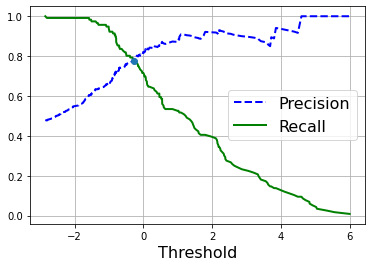

In [37]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.legend(loc="center right", fontsize=16) 
plt.xlabel("Threshold", fontsize=16)        
plt.grid(True)
first_line = LineString(np.column_stack((thresholds,precisions[:-1])))
second_line = LineString(np.column_stack((thresholds, recalls[:-1])))
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
  plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
  plt.plot(*intersection.xy, 'o')

In [38]:
x, y = intersection.xy
x

array('d', [-0.28476607719509495])

In [0]:
threshold=x

I have set threshold as the intersection of precision and recall curve

## Testing the model

In [0]:
social_transformed_test=full_pipeline.transform(social_test)

In [0]:
y_test_score=classifier.decision_function(social_transformed_test)

In [0]:
y_pred=(y_test_score>=threshold)

In [43]:
confusion_matrix(y_test,y_pred)

array([[45,  8],
       [ 4, 23]])

In [44]:
accuracy_score(y_test,y_pred)

0.85

In [45]:
precision_score(y_test,y_pred)

0.7419354838709677

In [46]:
recall_score(y_test,y_pred)

0.8518518518518519

In [47]:
f1_score(y_test,y_pred)

0.7931034482758621

## Final output

In [0]:
lb=LabelBinarizer()
y_output=lb.fit_transform(y_pred)

In [0]:
y_final=pd.DataFrame(y_output,index=social_test.index)

In [0]:
y_final.columns=['Model_prediction']

In [51]:
y_final

,Model_prediction
User ID,
15666675,1
15662067,0
15591433,0
15694395,0
15579212,0
...,...
15759066,0
15807909,0
15789863,0


In [0]:
final_output=pd.concat([social_test,y_final],axis=1)

In [53]:
final_output

,Gender,Age,EstimatedSalary,Model_prediction
User ID,,,,
15666675,Female,46,96000,1
15662067,Female,19,26000,0
15591433,Male,36,52000,0
15694395,Female,24,32000,0
15579212,Male,39,77000,0
...,...,...,...,...
15759066,Female,33,60000,0
15807909,Male,19,85000,0
15789863,Male,27,89000,0


In [0]:
final_output.to_csv('social_lr.csv')

In [0]:
files.download('social_lr.csv')